In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import shap 
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import shap 
from sklearn.feature_selection import mutual_info_classif


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,  VotingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, auc


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
data = pd.read_csv("C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/data.csv")

In [ ]:
data.head()

,Winner,title_bout,weight_class,no_of_rounds,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Red,False,Middleweight,3,0.255859,0.015625,0.509478,0.542871,0.002114,0.077554,...,0,2,1,0,Orthodox,187.96,190.50,185.0,34.0,27.0
1,Red,False,Welterweight,3,0.000000,0.000000,0.660000,0.470000,0.000000,0.400000,...,3,3,0,0,Orthodox,190.50,187.96,170.0,37.0,26.0
2,Blue,False,Light Heavyweight,3,0.128906,0.500000,0.314609,0.538398,0.013516,0.162188,...,1,5,5,1,Orthodox,193.04,193.04,205.0,35.0,35.0
3,Red,True,Light Heavyweight,5,0.125000,0.250000,0.565625,0.568750,0.645000,0.098750,...,1,5,0,0,Orthodox,193.04,200.66,205.0,31.0,36.0
4,Blue,False,Women's Bantamweight,3,0.003906,0.250000,0.392988,0.425273,0.723281,0.270820,...,1,0,4,0,Orthodox,167.64,167.64,135.0,32.0,32.0


In [ ]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class,Middleweight,Welterweight,Light Heavyweight,Light Heavyweight,Women's Bantamweight,Catch Weight,Featherweight,Featherweight,Bantamweight,Bantamweight,...,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_Height_cms,187.96,190.5,193.04,193.04,167.64,170.18,175.26,172.72,177.8,167.64,...,185.42,182.88,185.42,180.34,190.5,177.8,182.88,187.96,NaN,177.8
R_Reach_cms,190.5,187.96,193.04,200.66,167.64,180.34,175.26,177.8,177.8,175.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R_Weight_lbs,185.0,170.0,205.0,205.0,135.0,145.0,145.0,145.0,135.0,135.0,...,175.0,210.0,175.0,190.0,260.0,170.0,210.0,225.0,NaN,210.0
B_age,34.0,37.0,35.0,31.0,32.0,29.0,27.0,34.0,29.0,28.0,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0


In [ ]:
#checking for na/nan values

data["Winner"].isna().sum()

3

In [ ]:
#discarding nan values from Winner column since they are not useful for the model

df = data.dropna(subset=["Winner"])

In [ ]:
df["Winner"].isna().sum()

0

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class,Middleweight,Welterweight,Light Heavyweight,Light Heavyweight,Women's Bantamweight,Catch Weight,Featherweight,Featherweight,Bantamweight,Bantamweight,...,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_Height_cms,187.96,190.5,193.04,193.04,167.64,170.18,175.26,172.72,177.8,167.64,...,185.42,182.88,185.42,180.34,190.5,177.8,182.88,187.96,NaN,177.8
R_Reach_cms,190.5,187.96,193.04,200.66,167.64,180.34,175.26,177.8,177.8,175.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R_Weight_lbs,185.0,170.0,205.0,205.0,135.0,145.0,145.0,145.0,135.0,135.0,...,175.0,210.0,175.0,190.0,260.0,170.0,210.0,225.0,NaN,210.0
B_age,34.0,37.0,35.0,31.0,32.0,29.0,27.0,34.0,29.0,28.0,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0


In [ ]:
#now checking for na/nan values in the rest of the columns

df.isna().sum()

Winner             0
title_bout         0
weight_class       0
no_of_rounds       0
B_avg_KD        1661
                ... 
R_Height_cms      23
R_Reach_cms      418
R_Weight_lbs      21
B_age            172
R_age             82
Length: 140, dtype: int64

In [ ]:
#since weight is same in each weight class, we can fill na values with the mean of each weight class

df["weight_class"].value_counts()


weight_class
Lightweight              1322
Welterweight             1285
Middleweight             1019
Featherweight             745
Heavyweight               704
Light Heavyweight         690
Bantamweight              671
Flyweight                 338
Women's Strawweight       305
Women's Flyweight         225
Women's Bantamweight      207
Open Weight                86
Catch Weight               81
Women's Featherweight      29
Name: count, dtype: int64

In [ ]:
mean_weights = df.groupby("weight_class")[["R_Weight_lbs", "B_Weight_lbs"]].transform('mean')

mean_weights

,R_Weight_lbs,B_Weight_lbs
0,184.590775,184.794494
1,170.449805,169.729183
2,204.365217,202.308696
3,204.365217,202.308696
4,133.550725,132.439614
...,...,...
7705,225.635294,237.120482
7706,225.635294,237.120482
7707,225.635294,237.120482
7708,225.635294,237.120482


In [ ]:
# df['R_Weight_lbs'] = df['R_Weight_lbs'].fillna(mean_weights['R_Weight_lbs'])
# df['B_Weight_lbs'] = df['B_Weight_lbs'].fillna(mean_weights['B_Weight_lbs'])

df.loc[df['R_Weight_lbs'].isna(), 'R_Weight_lbs'] = mean_weights['R_Weight_lbs']
df.loc[df['B_Weight_lbs'].isna(), 'B_Weight_lbs'] = mean_weights['B_Weight_lbs']

In [ ]:
print(df['R_Weight_lbs'].isna().sum())
print(df['B_Weight_lbs'].isna().sum())

0
0


In [ ]:
#using same approach for height

mean_heights = df.groupby("weight_class")[["R_Height_cms", "B_Height_cms"]].transform('mean')

mean_heights

,R_Height_cms,B_Height_cms
0,184.641532,184.251150
1,181.330304,181.063455
2,187.716691,187.315797
3,187.716691,187.315797
4,169.333333,168.940676
...,...,...
7705,186.226824,184.624337
7706,186.226824,184.624337
7707,186.226824,184.624337
7708,186.226824,184.624337


In [ ]:
df.loc[df['R_Height_cms'].isna(), 'R_Height_cms'] = mean_heights['R_Height_cms']
df.loc[df['B_Height_cms'].isna(), 'B_Height_cms'] = mean_heights['B_Height_cms']

In [ ]:
print(df['R_Height_cms'].isna().sum())
print(df['B_Height_cms'].isna().sum())

0
0


In [ ]:
#correlation between reach and height

df[["R_Reach_cms", "R_Height_cms"]].corr()

,R_Reach_cms,R_Height_cms
R_Reach_cms,1.000000,0.896849
R_Height_cms,0.896849,1.000000


<Axes: >

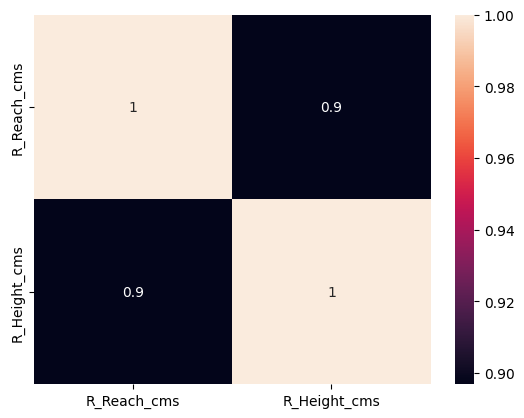

In [ ]:
#correlation plot for height and reach

sns.heatmap(df[["R_Reach_cms", "R_Height_cms"]].corr(), annot=True)


<Axes: >

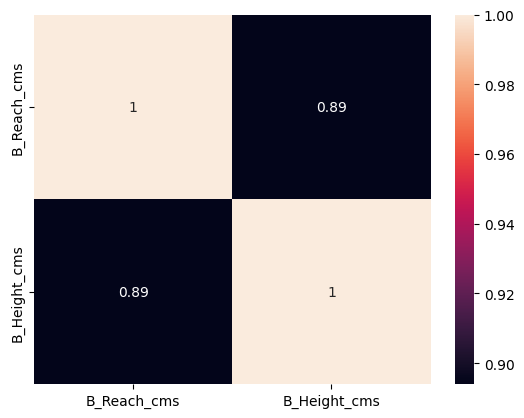

In [ ]:
#correlation between reach and weight for both red and blue fighters

df[["R_Reach_cms", "R_Weight_lbs"]].corr()

df[["B_Reach_cms", "B_Weight_lbs"]].corr()

#correlation plot for reach and weight

#sns.heatmap(df[["R_Reach_cms", "R_Weight_lbs"]].corr(), annot=True)

sns.heatmap(df[["B_Reach_cms", "B_Height_cms"]].corr(), annot=True)

In [ ]:
#since the correlation is high, we can fill na values in reach with the height. Reach is also the wingspan of the fighter which is usually the same as the height

df.loc[df['R_Reach_cms'].isna(), 'R_Reach_cms'] = df.loc[df['R_Reach_cms'].isna(), 'R_Height_cms']
df.loc[df['B_Reach_cms'].isna(), 'B_Reach_cms'] = df.loc[df['B_Reach_cms'].isna(), 'B_Height_cms']


In [ ]:
df['B_Reach_cms'].isna().sum()

0

In [ ]:
df.isna().sum()

Winner             0
title_bout         0
weight_class       0
no_of_rounds       0
B_avg_KD        1661
                ... 
R_Height_cms       0
R_Reach_cms        0
R_Weight_lbs       0
B_age            172
R_age             82
Length: 140, dtype: int64

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class,Middleweight,Welterweight,Light Heavyweight,Light Heavyweight,Women's Bantamweight,Catch Weight,Featherweight,Featherweight,Bantamweight,Bantamweight,...,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_Height_cms,187.96,190.5,193.04,193.04,167.64,170.18,175.26,172.72,177.8,167.64,...,185.42,182.88,185.42,180.34,190.5,177.8,182.88,187.96,186.226824,177.8
R_Reach_cms,190.5,187.96,193.04,200.66,167.64,180.34,175.26,177.8,177.8,175.26,...,185.42,182.88,185.42,180.34,190.5,177.8,182.88,187.96,186.226824,177.8
R_Weight_lbs,185.0,170.0,205.0,205.0,135.0,145.0,145.0,145.0,135.0,135.0,...,175.0,210.0,175.0,190.0,260.0,170.0,210.0,225.0,225.635294,210.0
B_age,34.0,37.0,35.0,31.0,32.0,29.0,27.0,34.0,29.0,28.0,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0


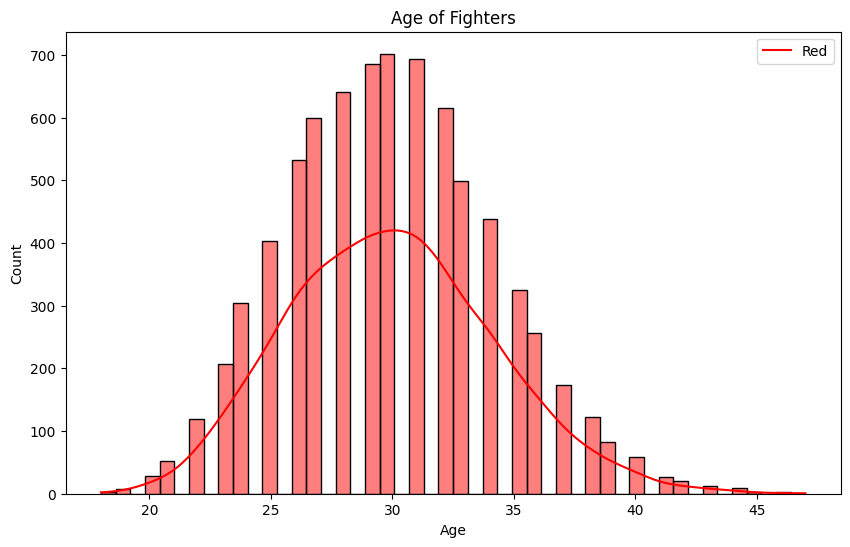

In [ ]:
#plot of age in red and blue fighters

plt.figure(figsize=(10, 6))
sns.histplot(df["R_age"], color="red", kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age of Fighters")
plt.legend(["Red"])
plt.show()

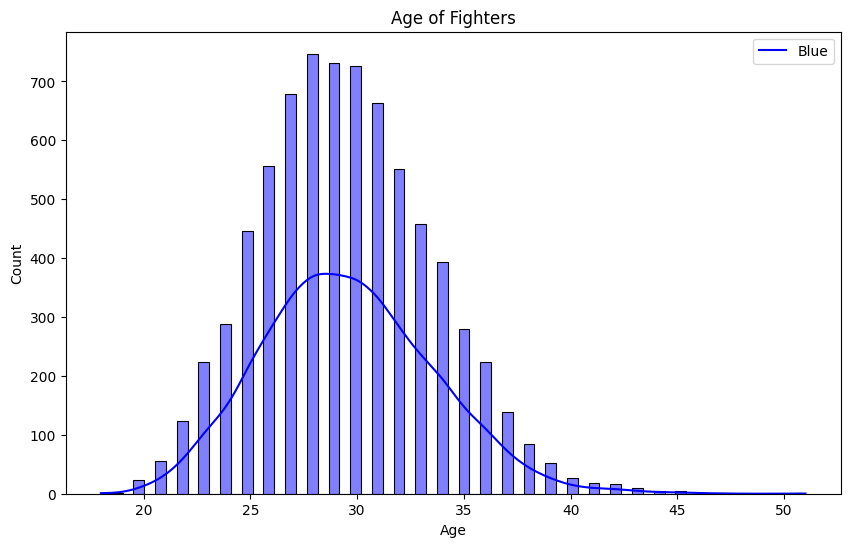

In [ ]:
#plot of age in red and blue fighters

plt.figure(figsize=(10, 6))
sns.histplot(df["B_age"], color="blue", kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age of Fighters")
plt.legend(["Blue"])
plt.show()

In [ ]:
#the age distribution looks like a normal distribution so we can fill na values with the median of the age because its robust to outliers

# df.loc[df["R_age"].isna(), "R_age"] = df["R_age"].median()
# df.loc[df["B_age"].isna(), "B_age"] = df["B_age"].median()

df = df.dropna(subset=["R_age", "B_age"])

In [ ]:
null_columns = df.columns[df.isnull().any()]

print("Columns with null values:")
for column in null_columns:
    print(f"{column}: {df[column].isnull().sum()} null values")

Columns with null values:
B_avg_KD: 1535 null values
B_avg_opp_KD: 1535 null values
B_avg_SIG_STR_pct: 1535 null values
B_avg_opp_SIG_STR_pct: 1535 null values
B_avg_TD_pct: 1535 null values
B_avg_opp_TD_pct: 1535 null values
B_avg_SUB_ATT: 1535 null values
B_avg_opp_SUB_ATT: 1535 null values
B_avg_REV: 1535 null values
B_avg_opp_REV: 1535 null values
B_avg_SIG_STR_att: 1535 null values
B_avg_SIG_STR_landed: 1535 null values
B_avg_opp_SIG_STR_att: 1535 null values
B_avg_opp_SIG_STR_landed: 1535 null values
B_avg_TOTAL_STR_att: 1535 null values
B_avg_TOTAL_STR_landed: 1535 null values
B_avg_opp_TOTAL_STR_att: 1535 null values
B_avg_opp_TOTAL_STR_landed: 1535 null values
B_avg_TD_att: 1535 null values
B_avg_TD_landed: 1535 null values
B_avg_opp_TD_att: 1535 null values
B_avg_opp_TD_landed: 1535 null values
B_avg_HEAD_att: 1535 null values
B_avg_HEAD_landed: 1535 null values
B_avg_opp_HEAD_att: 1535 null values
B_avg_opp_HEAD_landed: 1535 null values
B_avg_BODY_att: 1535 null values
B_avg

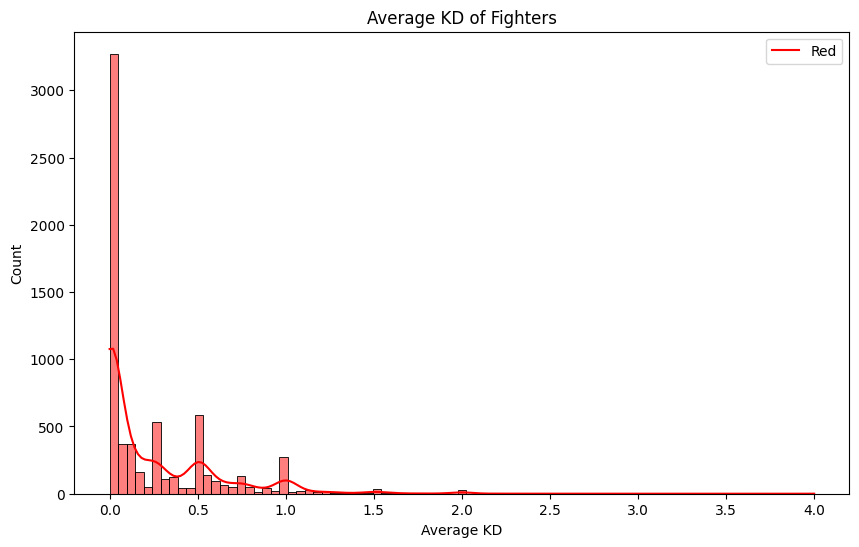

In [ ]:
#plot for avg kd for red and blue fighters

plt.figure(figsize=(10, 6))
sns.histplot(df["R_avg_KD"], color="red", kde=True)
plt.xlabel("Average KD")
plt.ylabel("Count")
plt.title("Average KD of Fighters")
plt.legend(["Red"])
plt.show()

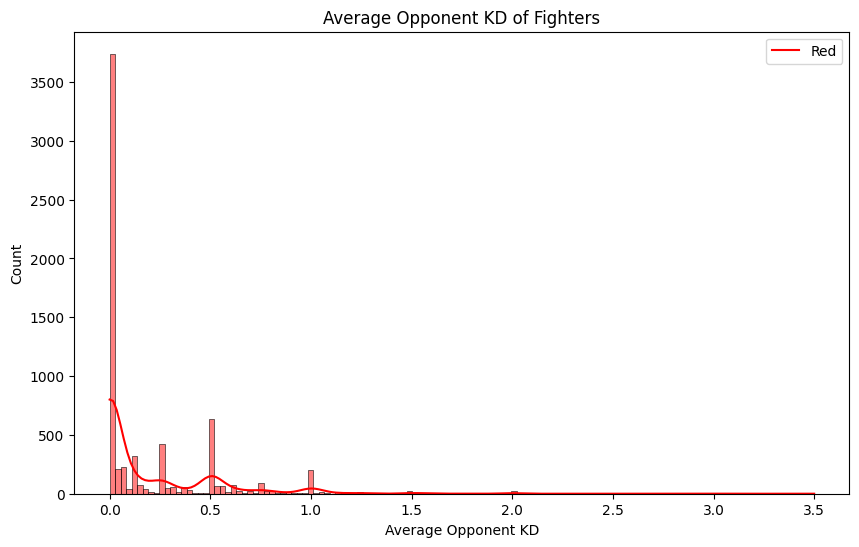

In [ ]:
#plotting R_avg_opp_KD

plt.figure(figsize=(10, 6))
sns.histplot(df["R_avg_opp_KD"], color="red", kde=True)
plt.xlabel("Average Opponent KD")
plt.ylabel("Count")
plt.title("Average Opponent KD of Fighters")
plt.legend(["Red"])

plt.show()

In [ ]:
numerical_columns = df[null_columns].select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df[null_columns].select_dtypes(include=['object']).columns

In [ ]:
#categorical columns names
categorical_columns

Index(['B_Stance', 'R_Stance'], dtype='object')

In [ ]:
#since median is robust to ouytliers, we can fill na values in numerical columns with the mean of the column

for col in numerical_columns:
    #df[col].fillna(df[col].median(), inplace=True)
    df.loc[df[col].isna(), col] = df[col].median()

for col in categorical_columns:
    #df[col].fillna(df[col].mode()[0], inplace=True)
    df.loc[df[col].isna(), col] = df[col].mode()[0]

In [ ]:
null_columns = df.columns[df.isnull().any()]

print("Columns with null values:")
for column in null_columns:
    print(f"{column}: {df[column].isnull().sum()} null values")

Columns with null values:


In [ ]:
df['B_Stance'].value_counts()

B_Stance
Orthodox       5628
Southpaw       1457
Switch          400
Open Stance       7
Sideways          1
Name: count, dtype: int64

In [ ]:
df['R_Stance'].value_counts()

R_Stance
Orthodox       5628
Southpaw       1494
Switch          356
Open Stance      15
Name: count, dtype: int64

In [ ]:
#converting categorical to numerical with one hot encoding

#df = pd.concat([df, pd.get_dummies(df[["weight_class"]], prefix="weight_class")], axis=1)
df = pd.concat([df, pd.get_dummies(df[["B_Stance"]], prefix="B_Stance")], axis=1)
df = pd.concat([df, pd.get_dummies(df[["R_Stance"]], prefix="R_Stance")], axis=1)

df.drop(columns=['weight_class', 'B_Stance', 'R_Stance'], inplace=True)

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7652,7656,7665,7672,7675,7683,7687,7692,7695,7700
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Draw,Red,Red,Draw,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,False
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,2,2,2,1,2,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.03125,0.03125,0.0,0.0
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_Stance_Switch,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Open Stance,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Orthodox,True,True,True,True,True,True,False,True,False,True,...,False,True,True,False,True,False,False,False,False,False
R_Stance_Southpaw,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,True,True,True,True


In [ ]:
#check for categories in the Winner column

df["Winner"].value_counts()

Winner
Red     4722
Blue    2631
Draw     140
Name: count, dtype: int64

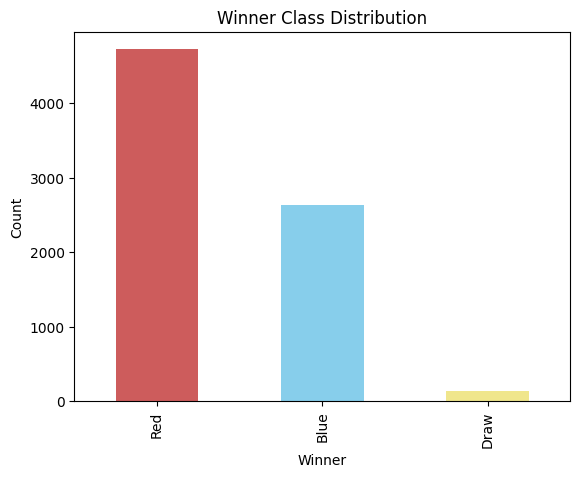

In [ ]:
df['Winner'].value_counts().plot(kind='bar', color=['indianred', 'skyblue', 'khaki'])
plt.title('Winner Class Distribution')
plt.xlabel('Winner')
plt.ylabel('Count')
plt.show()

In [ ]:
#dropping draw since the model will be predicting the winner and also they are very few, 143 out of 7564

df = df[df["Winner"] != "Draw"]

In [ ]:
df['Winner'] = df['Winner'].replace({'Red': 0, 'Blue': 1})


df['title_bout'] = df['title_bout'].astype(int)

C:\Users\kisha\AppData\Local\Temp\ipykernel_35076\2739264854.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Winner'] = df['Winner'].replace({'Red': 0, 'Blue': 1})


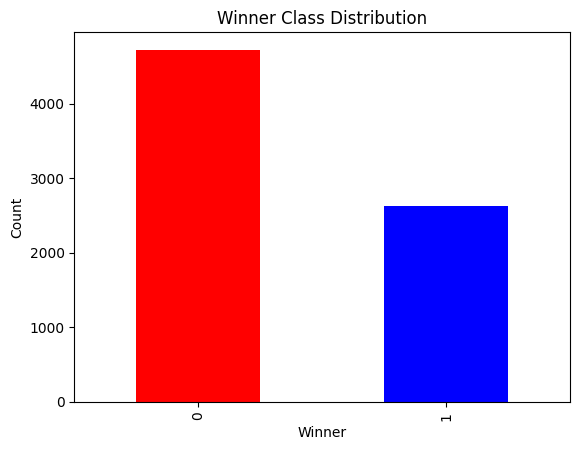

In [ ]:

#checking for class imbalance using plot with 0 being red and 1 being blue

df['Winner'].value_counts().plot(kind='bar', color=['red', 'blue', 'yellow'])
plt.title('Winner Class Distribution')
plt.xlabel('Winner')
plt.ylabel('Count')
plt.show()

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7644,7651,7652,7665,7672,7683,7687,7692,7695,7700
Winner,0,0,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
title_bout,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,2,2,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.03125,0.5,0.0,0.0,0.0,0.0,0.03125,0.03125,0.0,0.0
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_Stance_Switch,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Open Stance,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Orthodox,True,True,True,True,True,True,False,True,False,True,...,True,True,False,True,False,False,False,False,False,False
R_Stance_Southpaw,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,True,True,True,True,True


In [ ]:
df.to_csv("C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/data_cleaned_no_weight.csv", index=False)

INITIAL MODELLING
---

In [ ]:

X = df.drop(columns=["Winner"])
y = df["Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#LOGISTIC REGRESSION

log_reg = LogisticRegression(max_iter=10000, solver='saga')
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.65
Precision: 0.52
Recall: 0.30
F1 Score: 0.38
ROC AUC: 0.67
Confusion Matrix:
[[1596  289]
 [ 739  318]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.85      0.76      1885
           1       0.52      0.30      0.38      1057

    accuracy                           0.65      2942
   macro avg       0.60      0.57      0.57      2942
weighted avg       0.63      0.65      0.62      2942



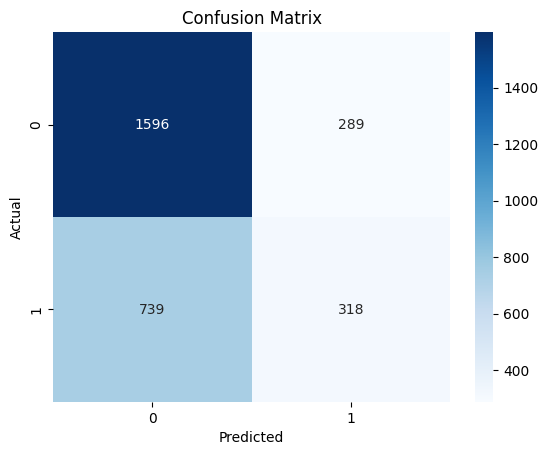

In [ ]:
#plotting confusion matrix

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#random forest

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
y_pred_prob = rf.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Accuracy: 0.65
Precision: 0.53
Recall: 0.16
F1 Score: 0.25
ROC AUC: 0.64
Confusion Matrix: [[1734  151]
 [ 884  173]]


In [ ]:
#XGBoost

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
y_pred = xgb_model.predict(X_test_scaled)
y_pred_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.63
Precision: 0.47
Recall: 0.30
F1 Score: 0.36
ROC AUC: 0.62
Confusion Matrix:
[[1527  358]
 [ 744  313]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.81      0.73      1885
           1       0.47      0.30      0.36      1057

    accuracy                           0.63      2942
   macro avg       0.57      0.55      0.55      2942
weighted avg       0.60      0.63      0.60      2942



In [ ]:
from sklearn.neural_network import MLPClassifier

#Neural nets

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)
y_pred_prob = mlp.predict_proba(X_test_scaled)[:, 1]

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.61
Precision: 0.45
Recall: 0.39
F1 Score: 0.42
ROC AUC: 0.61
Confusion Matrix:
[[1382  503]
 [ 641  416]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.73      0.71      1885
           1       0.45      0.39      0.42      1057

    accuracy                           0.61      2942
   macro avg       0.57      0.56      0.56      2942
weighted avg       0.60      0.61      0.60      2942



In [ ]:
#neural network

label_encoder = LabelEncoder()

# Fit and transform the labels to numeric values
y_train_encoded = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train_encoded, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


    

C:\Users\kisha\AppData\Local\Temp\ipykernel_89916\3134071260.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\kisha\AppData\Local\Temp\ipykernel_89916\3134071260.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)


In [ ]:
class Net1(nn.Module):
    def __init__(self, input_size):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [ ]:
input_size = 145  # Number of features in your dataset
model1 = Net1(input_size)

criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model1.parameters(), lr=0.001)  # Adam optimizer

# Training loop
num_epochs = 50  # Adjust the number of epochs as needed
model1.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clear the gradients
        outputs = model1(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

# Evaluating the model on the test set
model1.eval()
with torch.no_grad():
    outputs1 = model1(X_test)
    predictions1 = (outputs1.numpy() > 0.5).astype(int)

Epoch 1/50, Loss: 0.6500
Epoch 2/50, Loss: 0.5717
Epoch 3/50, Loss: 0.5167
Epoch 4/50, Loss: 0.4819
Epoch 5/50, Loss: 0.4564
Epoch 6/50, Loss: 0.4295
Epoch 7/50, Loss: 0.4091
Epoch 8/50, Loss: 0.3823
Epoch 9/50, Loss: 0.3636
Epoch 10/50, Loss: 0.3483
Epoch 11/50, Loss: 0.3289
Epoch 12/50, Loss: 0.3105
Epoch 13/50, Loss: 0.2907
Epoch 14/50, Loss: 0.2688
Epoch 15/50, Loss: 0.2568
Epoch 16/50, Loss: 0.2546
Epoch 17/50, Loss: 0.2246
Epoch 18/50, Loss: 0.2132
Epoch 19/50, Loss: 0.2088
Epoch 20/50, Loss: 0.1932
Epoch 21/50, Loss: 0.1776
Epoch 22/50, Loss: 0.1657
Epoch 23/50, Loss: 0.1461
Epoch 24/50, Loss: 0.1465
Epoch 25/50, Loss: 0.1500
Epoch 26/50, Loss: 0.1225
Epoch 27/50, Loss: 0.1153
Epoch 28/50, Loss: 0.1026
Epoch 29/50, Loss: 0.1159
Epoch 30/50, Loss: 0.1099
Epoch 31/50, Loss: 0.0981
Epoch 32/50, Loss: 0.0930
Epoch 33/50, Loss: 0.0791
Epoch 34/50, Loss: 0.0752
Epoch 35/50, Loss: 0.0670
Epoch 36/50, Loss: 0.0662
Epoch 37/50, Loss: 0.0788
Epoch 38/50, Loss: 0.0791
Epoch 39/50, Loss: 0.

In [ ]:
#evaluating the model
print('Accuracy:', accuracy_score(y_test, predictions1))
print('Precision:', precision_score(y_test, predictions1))
print('Recall:', recall_score(y_test, predictions1))
print('F1 Score:', f1_score(y_test, predictions1))
print('ROC AUC Score:', roc_auc_score(y_test, predictions1))

Accuracy: 0.6155938349954669
Precision: 0.4639443961772372
Recall: 0.44911690496215306
F1 Score: 0.4564102564102564
ROC AUC Score: 0.5790395845565482


In [ ]:
print(f'Length of y_test: {len(y_test)}')
print(f'Length of predictions1: {len(predictions1)}')


Length of y_test: 3309
Length of predictions1: 3309


In [ ]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, predictions1)

print(conf_matrix)

[[1503  617]
 [ 655  534]]


In [ ]:
lr = LogisticRegression()
rf = RandomForestClassifier()
xgb = xgb.XGBClassifier()
ng = GaussianNB()
gb = GradientBoostingClassifier()

In [ ]:
#ensemble model with voting classifier, LR, RF, XGB, NG, GB



voting = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('xgb', xgb), ('ng', ng), ('gb', gb)], voting='soft', n_jobs=-1)
voting.fit(X_train, y_train)

y_pred = voting.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))

Accuracy:  0.6380013596193066
Precision:  0.495
Recall:  0.37464522232734154
F1 Score: 0.42649434571890144
ROC AUC:  0.580160807450143


In [ ]:
#create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[1235  650]
 [ 462  595]]


USING SMOTE
---


In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

LOGISTIC REGRESSION

In [ ]:
log_reg_smote = LogisticRegression(max_iter=10000, solver='saga')
log_reg_smote.fit(X_train_scaled, y_train_resampled)

y_pred_lrsmote = log_reg_smote.predict(X_test_scaled)
y_pred_prob_lrsmote = log_reg_smote.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy = accuracy_score(y_test, y_pred_lrsmote)
precision = precision_score(y_test, y_pred_lrsmote)
recall = recall_score(y_test, y_pred_lrsmote)
f1 = f1_score(y_test, y_pred_lrsmote)
roc_auc = roc_auc_score(y_test, y_pred_prob_lrsmote)
conf_matrix = confusion_matrix(y_test, y_pred_lrsmote)
class_report = classification_report(y_test, y_pred_lrsmote)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.65
Precision: 0.52
Recall: 0.36
F1 Score: 0.43
ROC AUC: 0.66
Confusion Matrix:
[[1529  356]
 [ 675  382]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      1885
           1       0.52      0.36      0.43      1057

    accuracy                           0.65      2942
   macro avg       0.61      0.59      0.59      2942
weighted avg       0.63      0.65      0.63      2942



RANDOM FOREST

In [ ]:
#random forest

rf_smote = RandomForestClassifier()
rf_smote.fit(X_train_scaled, y_train_resampled)
y_pred_rfsmote = rf_smote.predict(X_test_scaled)

#evaluate the model

accuracy = accuracy_score(y_test, y_pred_rfsmote)
precision = precision_score(y_test, y_pred_rfsmote)
recall = recall_score(y_test, y_pred_rfsmote)
f1 = f1_score(y_test, y_pred_rfsmote)
roc_auc = roc_auc_score(y_test, y_pred_rfsmote)

conf_matrix_rf_smote = confusion_matrix(y_test, y_pred_rfsmote)
class_report_rf_smote = classification_report(y_test, y_pred_rfsmote)

print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1 Score: {f1:}")
print(f"ROC AUC: {roc_auc:}")
print("Confusion Matrix:")
print(conf_matrix_rf_smote)
print("Classification Report:")
print(class_report_rf_smote)

Accuracy: 0.6366417403127125
Precision: 0.49246231155778897
Recall: 0.3708609271523179
F1 Score: 0.423097679438748
ROC AUC: 0.5782686598626311
Confusion Matrix:
[[1481  404]
 [ 665  392]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.73      1885
           1       0.49      0.37      0.42      1057

    accuracy                           0.64      2942
   macro avg       0.59      0.58      0.58      2942
weighted avg       0.62      0.64      0.62      2942



XGBOOST

In [ ]:
#xgb with smote

xgb_model_smote = xgb.XGBClassifier()
xgb_model_smote.fit(X_train_scaled, y_train_resampled)
y_pred_xgb_smote = xgb_model_smote.predict(X_test_scaled)
y_pred_prob_xgb_smote = xgb_model_smote.predict_proba(X_test_scaled)[:, 1]

# evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb_smote)
precision = precision_score(y_test, y_pred_xgb_smote)
recall = recall_score(y_test, y_pred_xgb_smote)
f1 = f1_score(y_test, y_pred_xgb_smote)
roc_auc = roc_auc_score(y_test, y_pred_prob_xgb_smote)
conf_matrix = confusion_matrix(y_test, y_pred_xgb_smote)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.63
Precision: 0.48
Recall: 0.38
F1 Score: 0.43
ROC AUC: 0.63
Confusion Matrix:
[[1454  431]
 [ 655  402]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1885
           1       0.50      0.37      0.43      1057

    accuracy                           0.64      2942
   macro avg       0.59      0.58      0.58      2942
weighted avg       0.62      0.64      0.63      2942



VOTING ENSEMBLE

In [ ]:
#smote

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

voting.fit(X_train_smote, y_train_smote)
y_pred = voting.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))

Accuracy:  0.6220258327668253
Precision:  0.4779116465863454
Recall:  0.5629139072847682
F1 Score: 0.5169417897480452
ROC AUC:  0.6090431605389358


In [ ]:
#confusion matrix
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

[[1217  668]
 [ 474  583]]


NEURAL NETWORK


In [ ]:
#oversampling minority class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


In [ ]:

class Net2(nn.Module):
    def __init__(self, input_size):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x
    
input_size = 145  # Number of features in your dataset
model2 = Net2(input_size)

criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model2.parameters(), lr=0.001)  # Adam optimizer

# Training loop
num_epochs = 50  # Adjust the number of epochs as needed
model2.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clear the gradients
        outputs = model2(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

# Evaluating the model on the test set
model2.eval()
with torch.no_grad():
    outputs2 = model2(X_test)
    predictions2 = (outputs2.numpy() > 0.5).astype(int)

Epoch 1/50, Loss: 0.6517
Epoch 2/50, Loss: 0.5717
Epoch 3/50, Loss: 0.5236
Epoch 4/50, Loss: 0.4844
Epoch 5/50, Loss: 0.4575
Epoch 6/50, Loss: 0.4364
Epoch 7/50, Loss: 0.4092
Epoch 8/50, Loss: 0.3933
Epoch 9/50, Loss: 0.3675
Epoch 10/50, Loss: 0.3375
Epoch 11/50, Loss: 0.3365
Epoch 12/50, Loss: 0.3042
Epoch 13/50, Loss: 0.2851
Epoch 14/50, Loss: 0.2663
Epoch 15/50, Loss: 0.2538
Epoch 16/50, Loss: 0.2358
Epoch 17/50, Loss: 0.2288
Epoch 18/50, Loss: 0.2111
Epoch 19/50, Loss: 0.1949
Epoch 20/50, Loss: 0.1778
Epoch 21/50, Loss: 0.1670
Epoch 22/50, Loss: 0.1598
Epoch 23/50, Loss: 0.1429
Epoch 24/50, Loss: 0.1422
Epoch 25/50, Loss: 0.1325
Epoch 26/50, Loss: 0.1237
Epoch 27/50, Loss: 0.1135
Epoch 28/50, Loss: 0.0994
Epoch 29/50, Loss: 0.0887
Epoch 30/50, Loss: 0.0822
Epoch 31/50, Loss: 0.0807
Epoch 32/50, Loss: 0.0779
Epoch 33/50, Loss: 0.0671
Epoch 34/50, Loss: 0.0708
Epoch 35/50, Loss: 0.0791
Epoch 36/50, Loss: 0.0756
Epoch 37/50, Loss: 0.0838
Epoch 38/50, Loss: 0.0744
Epoch 39/50, Loss: 0.

In [ ]:
#evaluating the model
print('Accuracy:', accuracy_score(y_test, predictions2))
print('Precision:', precision_score(y_test, predictions2))
print('Recall:', recall_score(y_test, predictions2))
print('F1 Score:', f1_score(y_test, predictions2))
print('ROC AUC Score:', roc_auc_score(y_test, predictions2))

Accuracy: 0.6013901480809912
Precision: 0.44921875
Recall: 0.48359966358284273
F1 Score: 0.46577561765897124
ROC AUC Score: 0.575526246885761


In [ ]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, predictions2)

print(conf_matrix)

[[1415  705]
 [ 614  575]]


HYPER PARAMETER TUNING
---

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

#smote
smote = SMOTE(random_state=42)
X_train_resampled, y_train = smote.fit_resample(X_train, y_train)

#standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

LOGISTIC REGRESSION

In [ ]:
param_grid_lr = {
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'C': [0.1, 1, 10, 100],
    'class_weight': [None, 'balanced'],
    'penalty': ['l1', 'l2'],
    'max_iter': [1000, 10000]
}

grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_lr, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

In [ ]:
best_model_lr = grid_search.best_estimator_

#predict on the test set
y_pred = best_model_lr.predict(X_test_scaled)
y_pred_prob = best_model_lr.predict_proba(X_test_scaled)[:, 1]


#print evaluation metrics
print(f"Best Parameters: {grid_search.best_params_}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"Precision:", precision_score(y_test, y_pred))
print(f"Recall:", recall_score(y_test, y_pred))
print(f"F1 Score:", f1_score(y_test, y_pred))
print(f"ROC AUC: ", roc_auc_score(y_test, y_pred_prob))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.6604350781781101
Precision: 0.5316901408450704
Recall: 0.4301994301994302
F1 Score: 0.4755905511811024
ROC AUC:  0.6723877982039267
Confusion Matrix:
[[1490  399]
 [ 600  453]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1889
           1       0.53      0.43      0.48      1053

    accuracy                           0.66      2942
   macro avg       0.62      0.61      0.61      2942
weighted avg       0.65      0.66      0.65      2942



In [ ]:
import joblib

joblib.dump(best_model_lr, "C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/best_model_lr.pkl")

['C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/best_model_lr.pkl']

RANDOM FOREST

In [ ]:
#random forest grid search

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

#predict on the test set
y_pred_rf_gs = best_model.predict(X_test_scaled)
y_pred_prob_rf_gs = best_model.predict_proba(X_test_scaled)[:, 1]

#print evaluation metrics
print(f"Best Parameters: {grid_search.best_params_}")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_gs))
print(f"Precision:", precision_score(y_test, y_pred_rf_gs))
print(f"Recall:", recall_score(y_test, y_pred_rf_gs))
print(f"F1 Score:", f1_score(y_test, y_pred_rf_gs))
print(f"ROC AUC: ", roc_auc_score(y_test, y_pred_prob_rf_gs))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_gs))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_gs))


Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.6393609789259007
Precision: 0.49483204134366926
Recall: 0.3637226970560304
F1 Score: 0.4192665571975917
ROC AUC:  0.6456317049223348
Confusion Matrix:
[[1498  391]
 [ 670  383]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1889
           1       0.49      0.36      0.42      1053

    accuracy                           0.64      2942
   macro avg       0.59      0.58      0.58      2942
weighted avg       0.62      0.64      0.62      2942



In [ ]:
joblib.dump(best_model, "C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/best_model_rf.pkl")

['C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/best_model_rf.pkl']

XGBOOST

In [ ]:
#grid search for xgb

xgb_params = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'alpha': [0, 0.5, 1],
    'lambda': [1, 1.5, 2]
}

grid_search_xgb = RandomizedSearchCV(xgb.XGBClassifier(), xgb_params, cv=5, scoring='f1', n_iter=100)
grid_search_xgb.fit(X_train_scaled, y_train)

best_model_xgb = grid_search_xgb.best_estimator_

#predict on the test set
y_pred_xgb_gs = best_model_xgb.predict(X_test_scaled)
y_pred_prob_xgb_gs = best_model_xgb.predict_proba(X_test_scaled)[:, 1]

#print evaluation metrics
print(f"Best Parameters: {grid_search_xgb.best_params_}")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_gs))
print(f"Precision:", precision_score(y_test, y_pred_xgb_gs))
print(f"Recall:", recall_score(y_test, y_pred_xgb_gs))
print(f"F1 Score:", f1_score(y_test, y_pred_xgb_gs))
print(f"ROC AUC: ", roc_auc_score(y_test, y_pred_prob_xgb_gs))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_gs))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb_gs))


Best Parameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.05, 'lambda': 2, 'gamma': 0.2, 'colsample_bytree': 0.8, 'alpha': 0.5}
Accuracy: 0.6475186947654656
Precision: 0.5098765432098765
Recall: 0.3922127255460589
F1 Score: 0.4433709071390231
ROC AUC:  0.6605026250341232
Confusion Matrix:
[[1492  397]
 [ 640  413]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      1889
           1       0.51      0.39      0.44      1053

    accuracy                           0.65      2942
   macro avg       0.60      0.59      0.59      2942
weighted avg       0.63      0.65      0.64      2942



In [ ]:
joblib.dump(best_model_xgb, "C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/best_model_xgb.pkl")

['C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/best_model_xgb.pkl']

In [ ]:
#gauusian naive bayes 

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
y_pred_prob_nb = nb.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(f"Precision:", precision_score(y_test, y_pred_nb))
print(f"Recall:", recall_score(y_test, y_pred_nb))
print(f"F1 Score:", f1_score(y_test, y_pred_nb))
print(f"ROC AUC: ", roc_auc_score(y_test, y_pred_prob_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


Accuracy: 0.42692046227056424
Precision: 0.37191420477539455
Recall: 0.8727445394112061
F1 Score: 0.521566401816118
ROC AUC:  0.5812747565879735
Confusion Matrix:
[[ 337 1552]
 [ 134  919]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.18      0.29      1889
           1       0.37      0.87      0.52      1053

    accuracy                           0.43      2942
   macro avg       0.54      0.53      0.40      2942
weighted avg       0.59      0.43      0.37      2942



In [ ]:
#gradient boosting with grid search

gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}


grid_search_gb = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=5, scoring='f1')
grid_search_gb.fit(X_train_scaled, y_train)

best_model_gb = grid_search_gb.best_estimator_

#predict on the test set
y_pred_gb_gs = best_model_gb.predict(X_test_scaled)
y_pred_prob_gb_gs = best_model_gb.predict_proba(X_test_scaled)[:, 1]

#print evaluation metrics
print(f"Best Parameters: {grid_search_gb.best_params_}")
print("Accuracy:", accuracy_score(y_test, y_pred_gb_gs))
print(f"Precision:", precision_score(y_test, y_pred_gb_gs))
print(f"Recall:", recall_score(y_test, y_pred_gb_gs))
print(f"F1 Score:", f1_score(y_test, y_pred_gb_gs))
print(f"ROC AUC: ", roc_auc_score(y_test, y_pred_prob_gb_gs))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb_gs))
print("Classification Report:")
print(classification_report(y_test, y_pred_gb_gs))



Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.6410605030591434
Precision: 0.4982973893303065
Recall: 0.41690408357075026
F1 Score: 0.45398138572905894
ROC AUC:  0.6362385923000005
Confusion Matrix:
[[1447  442]
 [ 614  439]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1889
           1       0.50      0.42      0.45      1053

    accuracy                           0.64      2942
   macro avg       0.60      0.59      0.59      2942
weighted avg       0.63      0.64      0.63      2942



In [ ]:
joblib.dump(best_model_gb, "C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/best_model_gb.pkl")

['C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/best_model_gb.pkl']

ENSEMBLE WITH VOTING CLASSIFIER

In [ ]:
#voting classifier

voting_clf = VotingClassifier(estimators=[
    ('log_reg', best_model_lr),
    ('rf', best_model),
    ('xgb', best_model_xgb),
    ('nb', nb),
    ('gb', best_model_gb)
], voting='soft')

voting_clf.fit(X_train_scaled, y_train)

y_pred_voting = voting_clf.predict(X_test_scaled)
y_pred_prob_voting = voting_clf.predict_proba(X_test_scaled)[:, 1]

#evaluate the model 
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print(f"Precision:", precision_score(y_test, y_pred_voting))
print(f"Recall:", recall_score(y_test, y_pred_voting))
print(f"F1 Score:", f1_score(y_test, y_pred_voting))
print(f"ROC AUC: ", roc_auc_score(y_test, y_pred_prob_voting))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_voting))
print("Classification Report:")
print(classification_report(y_test, y_pred_voting))



Accuracy: 0.6267845003399048
Precision: 0.48299319727891155
Recall: 0.6068376068376068
F1 Score: 0.5378787878787878
ROC AUC:  0.6565636913263523
Confusion Matrix:
[[1205  684]
 [ 414  639]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.64      0.69      1889
           1       0.48      0.61      0.54      1053

    accuracy                           0.63      2942
   macro avg       0.61      0.62      0.61      2942
weighted avg       0.65      0.63      0.63      2942

